In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandoc

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('data_gov.csv')

# Create a copy of the dataframe for manipulation
df = df.copy()

# Rename the first two columns
df.columns.values[0] = 'Cluster'
df.columns.values[1] = 'Agency'

# Extract the year from column names and concatenate with values from rows 0 and 1
new_column_names = [
    f"{col.split('.')[0]} {df.iloc[0, idx]} {df.iloc[1, idx]}" if 'Unnamed' not in col else df.iloc[1, idx]
    for idx, col in enumerate(df.columns)
]

# Ensure the first two columns are named correctly
new_column_names[0] = 'Cluster'
new_column_names[1] = 'Agency'

# Update the dataframe column names
df.columns = new_column_names

# Drop the first two rows since they are now part of the column names
df = df.drop([0, 1]).reset_index(drop=True)

# Drop last three tails (total rows)
df = df.drop(df.tail(3).index).copy()

# Trends over time in male and female employment

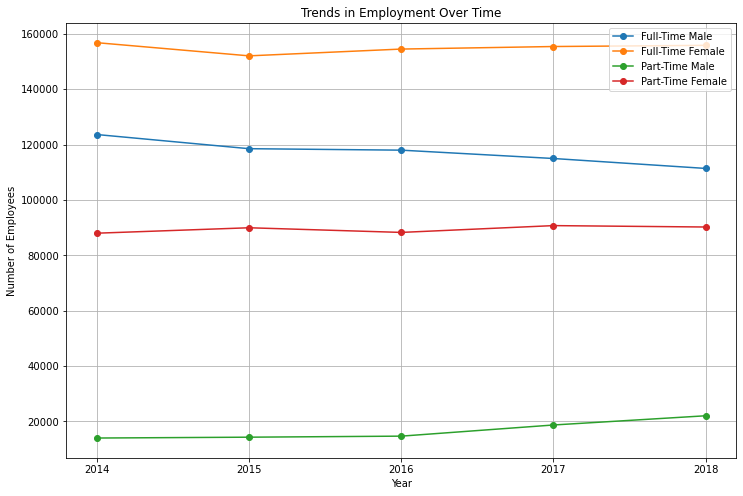

In [3]:
# Remove commas from the numeric columns and convert to numeric
for col in df.columns[2:]:
    df[col] = df[col].str.replace(',', '')  # Remove commas
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric

# Aggregate data by year
years = ['2014', '2015', '2016', '2017', '2018']
summary = {}

for year in years:
    summary[year] = {
        'Full-Time Male': df[f'{year} Full-Time Male'].sum(),
        'Full-Time Female': df[f'{year} Full-Time Female'].sum(),
        'Part-Time Male': df[f'{year} Part-Time Male'].sum(),
        'Part-Time Female': df[f'{year} Part-Time Female'].sum()
    }

# Convert summary to DataFrame
summary_df = pd.DataFrame(summary).T

# Plot trends
plt.figure(figsize=(12, 8))
plt.plot(summary_df.index, summary_df['Full-Time Male'], marker='o', label='Full-Time Male')
plt.plot(summary_df.index, summary_df['Full-Time Female'], marker='o', label='Full-Time Female')
plt.plot(summary_df.index, summary_df['Part-Time Male'], marker='o', label='Part-Time Male')
plt.plot(summary_df.index, summary_df['Part-Time Female'], marker='o', label='Part-Time Female')

plt.title('Trends in Employment Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.legend()
plt.grid(True)

plt.savefig('Trends_in_Employment.jpeg', format='jpeg', dpi=300)


plt.show()

In [4]:
summary_df

,Full-Time Male,Full-Time Female,Part-Time Male,Part-Time Female
2014,123614,156793,13995,87983
2015,118504,152038,14302,89943
2016,117976,154489,14678,88264
2017,114962,155408,18706,90721
2018,111377,155833,22034,90216


### Summary of Trends and Notable Changes

#### Full-Time Employment:
- There has been a steady decline in the number of full-time male employees, decreasing from 123,614 in 2014 to 111,377 in 2018.
- Full-time female employment has remained relatively stable, with a slight decrease from 156,793 in 2014 to 155,833 in 2018.

#### Part-Time Employment:
- Part-time male employment has shown a significant increase over the years. It rose from 13,995 in 2014 to 22,034 in 2018, indicating a growing trend of males engaging in part-time work.
- Part-time female employment experienced fluctuations, starting at 87,983 in 2014, peaking at 90,943 in 2015, and then stabilizing around 90,216 by 2018.

#### Notable Changes:
- The most notable change is the rise in part-time employment among males, which almost doubled from 2014 to 2018.
- The steady full-time employment for females contrasted with the declining trend in full-time male employment suggests a shift in employment patterns.

# The current representation of part time employees in the sector and in each Cluster

In [5]:
# Group by Cluster and sum part-time employees by gender
cluster_summary_gender = df.groupby('Cluster').agg({
    '2014 Part-Time Male': 'sum',
    '2014 Part-Time Female': 'sum',
    '2015 Part-Time Male': 'sum',
    '2015 Part-Time Female': 'sum',
    '2016 Part-Time Male': 'sum',
    '2016 Part-Time Female': 'sum',
    '2017 Part-Time Male': 'sum',
    '2017 Part-Time Female': 'sum',
    '2018 Part-Time Male': 'sum',
    '2018 Part-Time Female': 'sum'
}).reset_index()

# Calculate differences between male and female part-time employees
cluster_summary_gender['2014 Difference'] = cluster_summary_gender['2014 Part-Time Male'] - cluster_summary_gender['2014 Part-Time Female']
cluster_summary_gender['2015 Difference'] = cluster_summary_gender['2015 Part-Time Male'] - cluster_summary_gender['2015 Part-Time Female']
cluster_summary_gender['2016 Difference'] = cluster_summary_gender['2016 Part-Time Male'] - cluster_summary_gender['2016 Part-Time Female']
cluster_summary_gender['2017 Difference'] = cluster_summary_gender['2017 Part-Time Male'] - cluster_summary_gender['2017 Part-Time Female']
cluster_summary_gender['2018 Difference'] = cluster_summary_gender['2018 Part-Time Male'] - cluster_summary_gender['2018 Part-Time Female']


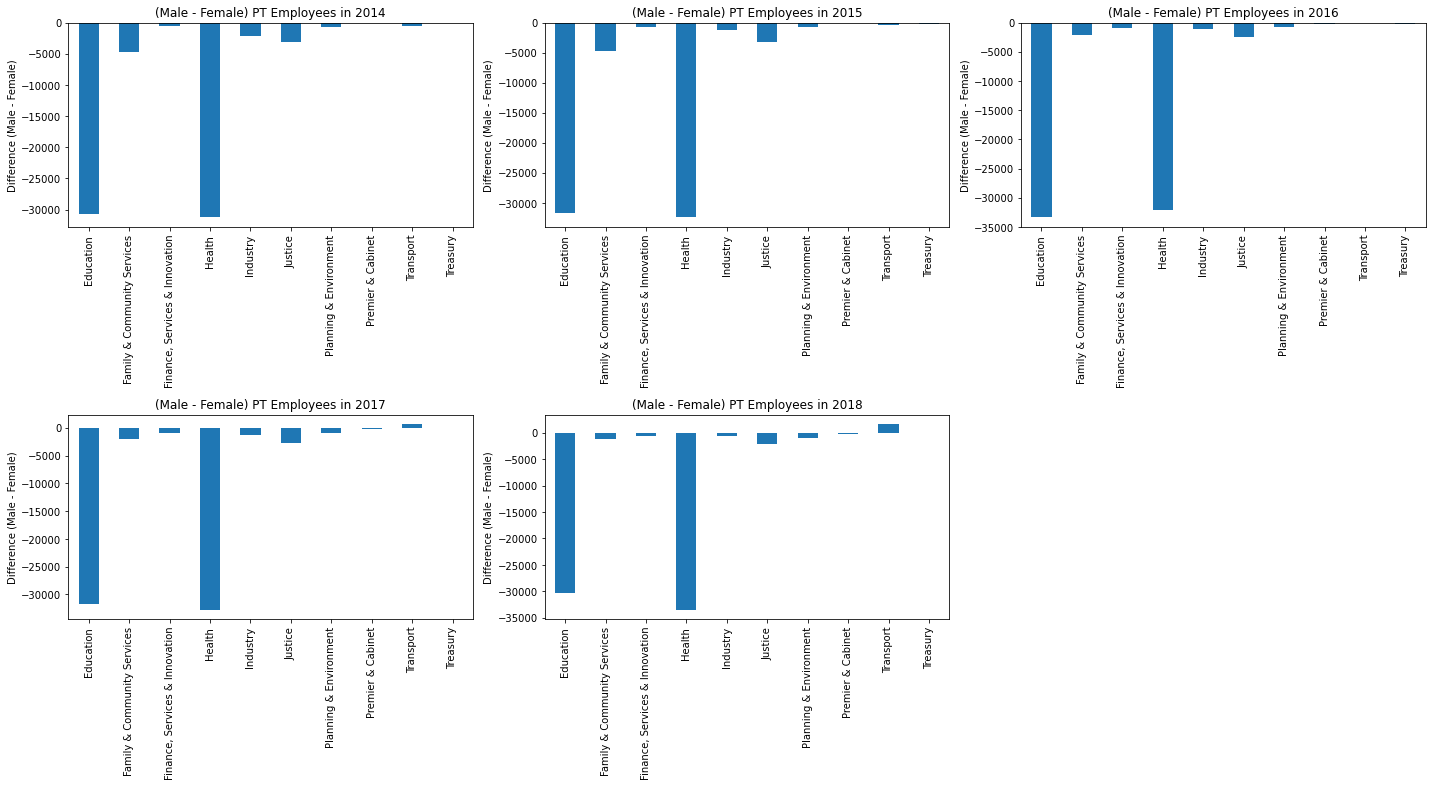

In [6]:
import matplotlib.pyplot as plt

# Define the years and the number of subplots
years = ['2014', '2015', '2016', '2017', '2018']
num_plots = len(years)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the differences for each year
for i, year in enumerate(years):
    ax = axes[i]
    cluster_summary_gender.plot(x='Cluster', y=f'{year} Difference', kind='bar', ax=ax, legend=False)
    ax.set_title(f'(Male - Female) PT Employees in {year}')
    ax.set_xlabel('')
    ax.set_ylabel('Difference (Male - Female)')

# # Set x-axis labels only for the necessary plots
# axes[3].set_xlabel('')  # Bottom left
# axes[4].set_xlabel('')  # Bottom middle
# axes[2].set_xlabel('')  # Top right

# Hide any unused subplots (in this case, the 6th subplot)
for j in range(5, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include space for the title

# Save the figure with a higher resolution
plt.savefig('Representation_PT_Clusters_fixed.jpeg', format='jpeg', dpi=300)

plt.show()


In [7]:
cluster_summary_gender

,Cluster,2014 Part-Time Male,2014 Part-Time Female,2015 Part-Time Male,2015 Part-Time Female,2016 Part-Time Male,2016 Part-Time Female,2017 Part-Time Male,2017 Part-Time Female,2018 Part-Time Male,2018 Part-Time Female,2014 Difference,2015 Difference,2016 Difference,2017 Difference,2018 Difference
0,Education,4883,35549,5159,36801,5582,38938,7441,39141,8783,39156,-30666,-31642,-33356,-31700,-30373
1,Family & Community Services,1045,5819,1028,5800,728,2866,732,2754,113,1399,-4774,-4772,-2138,-2022,-1286
2,"Finance, Services & Innovation",101,639,172,872,206,1078,442,1404,690,1368,-538,-700,-872,-962,-678
3,Health,5318,36559,5632,38055,5854,37992,6484,39259,7498,41002,-31241,-32423,-32138,-32775,-33504
4,Industry,654,2788,376,1697,331,1521,337,1567,114,699,-2134,-1321,-1190,-1230,-585
5,Justice,418,3529,418,3590,316,2811,735,3505,1447,3574,-3111,-3172,-2495,-2770,-2127
6,Planning & Environment,294,1032,279,1075,284,1081,320,1256,302,1251,-738,-796,-797,-936,-949
7,Premier & Cabinet,67,219,67,230,80,280,69,288,71,292,-152,-163,-200,-219,-221
8,Transport,1198,1754,1145,1548,1275,1436,2129,1430,2998,1345,-556,-403,-161,699,1653
9,Treasury,17,95,26,275,22,261,17,117,18,130,-78,-249,-239,-100,-112


In [25]:
cluster_summary_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cluster                10 non-null     object
 1   2014 Part-Time Male    10 non-null     int64 
 2   2014 Part-Time Female  10 non-null     int64 
 3   2015 Part-Time Male    10 non-null     int64 
 4   2015 Part-Time Female  10 non-null     int64 
 5   2016 Part-Time Male    10 non-null     int64 
 6   2016 Part-Time Female  10 non-null     int64 
 7   2017 Part-Time Male    10 non-null     int64 
 8   2017 Part-Time Female  10 non-null     int64 
 9   2018 Part-Time Male    10 non-null     int64 
 10  2018 Part-Time Female  10 non-null     int64 
 11  2014 Difference        10 non-null     int64 
 12  2015 Difference        10 non-null     int64 
 13  2016 Difference        10 non-null     int64 
 14  2017 Difference        10 non-null     int64 
 15  2018 Difference        10 

### Summary of Trends and Notable Changes

#### Overall Trends:

- Part-time male employment has generally been lower than part-time female employment across all clusters.
- There has been an increase in part-time male employment in most clusters from 2014 to 2018, with notable increases in clusters like Education, Transport, and Health.
- Part-time female employment has remained relatively stable or slightly increased in most clusters over the years.

#### Cluster-specific Observations

- Education: This cluster shows the highest part-time employment for both males and females, with females significantly outnumbering males. The difference between male and female part-time employment has decreased slightly from -30,666 in 2014 to -30,373 in 2018.
- Family & Community Services: Both male and female part-time employment have decreased, with a smaller but still significant gender difference, decreasing from -4,774 in 2014 to -1,286 in 2018.
- Finance, Services & Innovation: There has been an increase in part-time employment for both genders, but the gender gap remains large, though it decreased slightly from -538 in 2014 to -678 in 2018.
- Health: This cluster consistently shows a high number of part-time employees, especially females. The gender gap has increased from -31,241 in 2014 to -33,504 in 2018.
- Industry: The gap has narrowed significantly, from -2,134 in 2014 to -585 in 2018, indicating a notable reduction in the disparity.
- Justice: The gender gap has reduced from -3,111 in 2014 to -2,127 in 2018, with a noticeable increase in part-time male employment.
- Planning & Environment: The gender difference has remained relatively constant, with slight increases in both male and female part-time employment.
- Premier & Cabinet: The cluster shows a stable but small gap between male and female part-time employment.
- Transport: This cluster has seen a significant increase in part-time male employment, with the gender gap turning positive in 2018 (+1,653), indicating more part-time males than females.
- Treasury: The gender gap has remained relatively small but stable, with a slight increase in part-time male employment.


# The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster

In [8]:
# Calculate total workforce by gender for each year
for year in range(2014, 2019):
    df[f'{year} Total Male'] = df[f'{year} Full-Time Male'] + df[f'{year} Part-Time Male']
    df[f'{year} Total Female'] = df[f'{year} Full-Time Female'] + df[f'{year} Part-Time Female']
  
# Calculate proportions of part-time employees
for year in range(2014, 2019):
    df[f'{year} Part-Time Proportion Male'] = df[f'{year} Part-Time Male'] / df[f'{year} Total Male']
    df[f'{year} Part-Time Proportion Female'] = df[f'{year} Part-Time Female'] / df[f'{year} Total Female']    
    

# Group by Cluster and calculate mean proportions
cluster_proportion = df.groupby('Cluster').agg({
    '2014 Part-Time Proportion Male': 'mean',
    '2014 Part-Time Proportion Female': 'mean',
    '2015 Part-Time Proportion Male': 'mean',
    '2015 Part-Time Proportion Female': 'mean',
    '2016 Part-Time Proportion Male': 'mean',
    '2016 Part-Time Proportion Female': 'mean',
    '2017 Part-Time Proportion Male': 'mean',
    '2017 Part-Time Proportion Female': 'mean',
    '2018 Part-Time Proportion Male': 'mean',
    '2018 Part-Time Proportion Female': 'mean'
}).reset_index()    
    
# Group by Cluster and calculate mean proportions for male and female
cluster_proportion_male = df.groupby('Cluster').agg({
    '2014 Part-Time Proportion Male': 'mean',
    '2015 Part-Time Proportion Male': 'mean',
    '2016 Part-Time Proportion Male': 'mean',
    '2017 Part-Time Proportion Male': 'mean',
    '2018 Part-Time Proportion Male': 'mean'
}).reset_index()

cluster_proportion_female = df.groupby('Cluster').agg({
    '2014 Part-Time Proportion Female': 'mean',
    '2015 Part-Time Proportion Female': 'mean',
    '2016 Part-Time Proportion Female': 'mean',
    '2017 Part-Time Proportion Female': 'mean',
    '2018 Part-Time Proportion Female': 'mean'
}).reset_index()


# Calculate sector-wide mean proportions for male and female
sector_proportion_male = df[[
    '2014 Part-Time Proportion Male',
    '2015 Part-Time Proportion Male',
    '2016 Part-Time Proportion Male',
    '2017 Part-Time Proportion Male',
    '2018 Part-Time Proportion Male'
]].mean().to_frame().T

sector_proportion_female = df[[
    '2014 Part-Time Proportion Female',
    '2015 Part-Time Proportion Female',
    '2016 Part-Time Proportion Female',
    '2017 Part-Time Proportion Female',
    '2018 Part-Time Proportion Female'
]].mean().to_frame().T



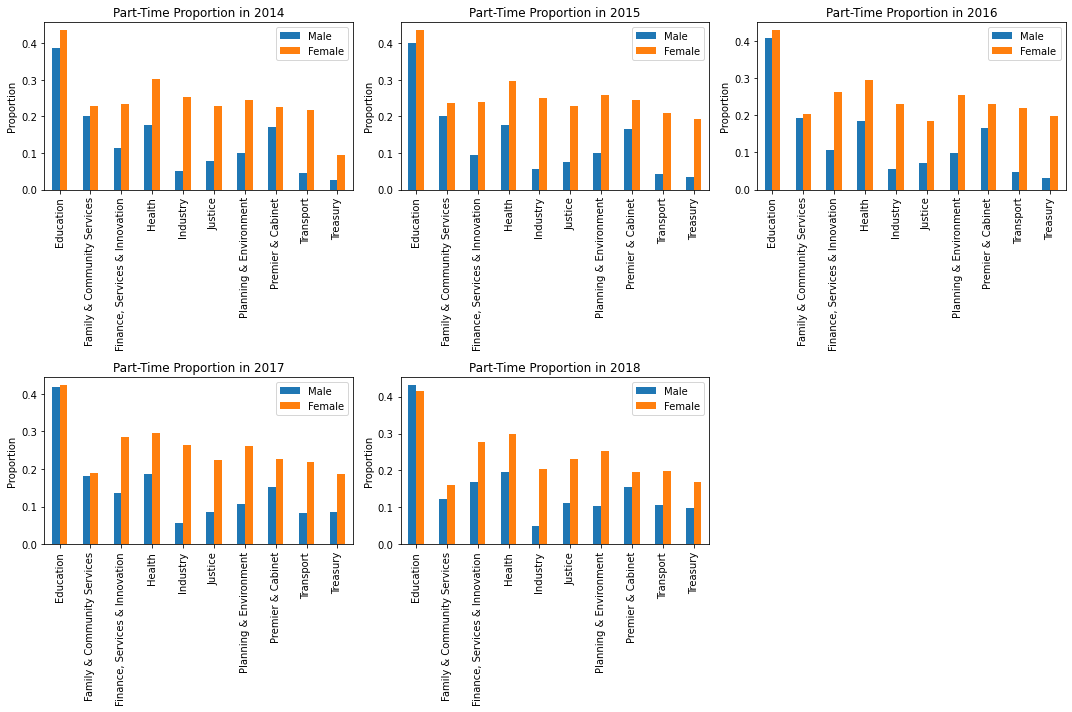

In [10]:
# Plotting the proportions for each year in the same plot for both male and female
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Define the years
years = [2014, 2015, 2016, 2017, 2018]

# Plot the data for male and female proportions
for i, year in enumerate(years):
    ax = axes[i]
    cluster_proportion.plot(
        x='Cluster',
        y=[f'{year} Part-Time Proportion Male', f'{year} Part-Time Proportion Female'],
        kind='bar',
        ax=ax
    )
    ax.set_title(f'Part-Time Proportion in {year}')
    ax.set_xlabel('')
    ax.set_ylabel('Proportion')
    ax.legend(["Male", "Female"])

# Hide any unused subplots (in this case, the 6th subplot)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include space for the title    
    
plt.savefig('PT_Proportion.jpeg', format='jpeg', dpi=300)

plt.tight_layout()
plt.show()

In [11]:
cluster_proportion_male

,Cluster,2014 Part-Time Proportion Male,2015 Part-Time Proportion Male,2016 Part-Time Proportion Male,2017 Part-Time Proportion Male,2018 Part-Time Proportion Male
0,Education,0.387638,0.401614,0.408794,0.418980,0.431712
1,Family & Community Services,0.200156,0.201073,0.191573,0.182025,0.121971
2,"Finance, Services & Innovation",0.113089,0.094927,0.105342,0.135204,0.168867
3,Health,0.176787,0.177437,0.185022,0.186881,0.195247
4,Industry,0.052049,0.055685,0.056562,0.055470,0.049386
5,Justice,0.076927,0.075993,0.070739,0.086361,0.110410
6,Planning & Environment,0.098554,0.100053,0.098336,0.106500,0.104605
7,Premier & Cabinet,0.171033,0.165607,0.165709,0.152324,0.156216
8,Transport,0.045845,0.043570,0.048186,0.084241,0.106922
9,Treasury,0.024910,0.033815,0.030893,0.084691,0.097178


In [19]:
cluster_proportion_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cluster                         10 non-null     object 
 1   2014 Part-Time Proportion Male  10 non-null     float64
 2   2015 Part-Time Proportion Male  10 non-null     float64
 3   2016 Part-Time Proportion Male  10 non-null     float64
 4   2017 Part-Time Proportion Male  10 non-null     float64
 5   2018 Part-Time Proportion Male  10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 608.0+ bytes


In [20]:
cluster_proportion_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Cluster                           10 non-null     object 
 1   2014 Part-Time Proportion Female  10 non-null     float64
 2   2015 Part-Time Proportion Female  10 non-null     float64
 3   2016 Part-Time Proportion Female  10 non-null     float64
 4   2017 Part-Time Proportion Female  10 non-null     float64
 5   2018 Part-Time Proportion Female  10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 608.0+ bytes


In [12]:
cluster_proportion_female

,Cluster,2014 Part-Time Proportion Female,2015 Part-Time Proportion Female,2016 Part-Time Proportion Female,2017 Part-Time Proportion Female,2018 Part-Time Proportion Female
0,Education,0.434828,0.435290,0.428480,0.423613,0.414167
1,Family & Community Services,0.229468,0.238047,0.202195,0.189284,0.160638
2,"Finance, Services & Innovation",0.233586,0.239128,0.262142,0.284609,0.276396
3,Health,0.301591,0.298053,0.294641,0.295658,0.298089
4,Industry,0.252505,0.251020,0.231220,0.262758,0.204695
5,Justice,0.226954,0.227641,0.183374,0.222866,0.230952
6,Planning & Environment,0.245088,0.257434,0.254227,0.262327,0.253495
7,Premier & Cabinet,0.225605,0.244938,0.229806,0.226407,0.196921
8,Transport,0.218246,0.210530,0.219486,0.219096,0.197551
9,Treasury,0.093937,0.193653,0.197109,0.186000,0.168733


In [21]:
sector_proportion_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2014 Part-Time Proportion Male  1 non-null      float64
 1   2015 Part-Time Proportion Male  1 non-null      float64
 2   2016 Part-Time Proportion Male  1 non-null      float64
 3   2017 Part-Time Proportion Male  1 non-null      float64
 4   2018 Part-Time Proportion Male  1 non-null      float64
dtypes: float64(5)
memory usage: 168.0 bytes


In [22]:
sector_proportion_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   2014 Part-Time Proportion Female  1 non-null      float64
 1   2015 Part-Time Proportion Female  1 non-null      float64
 2   2016 Part-Time Proportion Female  1 non-null      float64
 3   2017 Part-Time Proportion Female  1 non-null      float64
 4   2018 Part-Time Proportion Female  1 non-null      float64
dtypes: float64(5)
memory usage: 168.0 bytes


### Notable Cluster-Level Analysis

#### Education:
- **Males:** The proportion of part-time male employees has increased steadily from 38.8% in 2014 to 43.2% in 2018.
- **Females:** The proportion has remained relatively stable, with a slight decrease from 43.5% in 2014 to 41.4% in 2018.

#### Family & Community Services:
- **Males:** There has been a significant decline in part-time male employees, from 20.0% in 2014 to 12.2% in 2018.
- **Females:** The proportion has also decreased notably, from 22.9% in 2014 to 16.1% in 2018.

#### Finance, Services & Innovation:
- **Males:** The proportion has increased from 11.3% in 2014 to 16.9% in 2018, despite some fluctuations.
- **Females:** The proportion has generally increased from 23.4% in 2014 to 27.6% in 2018.

#### Industry:
- **Females:** A significant decrease from 25.3% in 2014 to 20.5% in 2018.

#### Transport:
- **Males:** There has been a noticeable increase in part-time male employees, from 4.6% in 2014 to 10.7% in 2018.


### Summary

- **Overall Increase for Males:** There is a general trend of increasing part-time male employment in several clusters, with notable increases in the Education, Transport, and Treasury clusters.
- **Stability or Decrease for Females:** Part-time female employment has remained relatively stable or has slightly decreased in most clusters.
- **Sector-Wide Trends:** The sector-wide proportion of part-time male employees has shown a steady increase, while the proportion of part-time female employees has slightly decreased over the years.


In [17]:
cluster_proportion

,Cluster,2014 Part-Time Proportion Male,2014 Part-Time Proportion Female,2015 Part-Time Proportion Male,2015 Part-Time Proportion Female,2016 Part-Time Proportion Male,2016 Part-Time Proportion Female,2017 Part-Time Proportion Male,2017 Part-Time Proportion Female,2018 Part-Time Proportion Male,2018 Part-Time Proportion Female
0,Education,0.387638,0.434828,0.401614,0.435290,0.408794,0.428480,0.418980,0.423613,0.431712,0.414167
1,Family & Community Services,0.200156,0.229468,0.201073,0.238047,0.191573,0.202195,0.182025,0.189284,0.121971,0.160638
2,"Finance, Services & Innovation",0.113089,0.233586,0.094927,0.239128,0.105342,0.262142,0.135204,0.284609,0.168867,0.276396
3,Health,0.176787,0.301591,0.177437,0.298053,0.185022,0.294641,0.186881,0.295658,0.195247,0.298089
4,Industry,0.052049,0.252505,0.055685,0.251020,0.056562,0.231220,0.055470,0.262758,0.049386,0.204695
5,Justice,0.076927,0.226954,0.075993,0.227641,0.070739,0.183374,0.086361,0.222866,0.110410,0.230952
6,Planning & Environment,0.098554,0.245088,0.100053,0.257434,0.098336,0.254227,0.106500,0.262327,0.104605,0.253495
7,Premier & Cabinet,0.171033,0.225605,0.165607,0.244938,0.165709,0.229806,0.152324,0.226407,0.156216,0.196921
8,Transport,0.045845,0.218246,0.043570,0.210530,0.048186,0.219486,0.084241,0.219096,0.106922,0.197551
9,Treasury,0.024910,0.093937,0.033815,0.193653,0.030893,0.197109,0.084691,0.186000,0.097178,0.168733


In [24]:
from sklearn.linear_model import LinearRegression

# Define the years array
years = np.array([2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)

# Function to perform linear regression and project to 2025
def project_to_2025(years, values):
    model = LinearRegression()
    model.fit(years, values)
    return model.predict(np.array([[2025]]))[0]

# Project for each cluster
projections_male = {}
projections_female = {}

for i, row in cluster_proportion_male.iterrows():
    cluster = row['Cluster']
    values = row[1:].values.reshape(-1, 1)  # Extract the proportion values
    projections_male[cluster] = project_to_2025(years, values)

for i, row in cluster_proportion_female.iterrows():
    cluster = row['Cluster']
    values = row[1:].values.reshape(-1, 1)  # Extract the proportion values
    projections_female[cluster] = project_to_2025(years, values)

# Project for sector proportions
sector_projection_male = project_to_2025(years, sector_proportion_male.values.flatten().reshape(-1, 1))
sector_projection_female = project_to_2025(years, sector_proportion_female.values.flatten().reshape(-1, 1))

# Display the projections
print("Projections for Male Proportions by 2025:")
for cluster, projection in projections_male.items():
    print(f"{cluster}: {projection[0]:.4f}")

print("\nProjections for Female Proportions by 2025:")
for cluster, projection in projections_female.items():
    print(f"{cluster}: {projection[0]:.4f}")

print("\nSector-Wide Projections by 2025:")
print(f"Male: {sector_projection_male[0]:.4f}")
print(f"Female: {sector_projection_female[0]:.4f}")

Projections for Male Proportions by 2025:
Education: 0.5047
Family & Community Services: 0.0215
Finance, Services & Innovation: 0.2601
Health: 0.2260
Industry: 0.0488
Justice: 0.1537
Planning & Environment: 0.1183
Premier & Cabinet: 0.1236
Transport: 0.2123
Treasury: 0.2302

Projections for Female Proportions by 2025:
Education: 0.3796
Family & Community Services: 0.0361
Finance, Services & Innovation: 0.3772
Health: 0.2891
Industry: 0.1649
Justice: 0.2213
Planning & Environment: 0.2740
Premier & Cabinet: 0.1564
Transport: 0.1834
Treasury: 0.2956

Sector-Wide Projections by 2025:
Male: 0.1834
Female: 0.2417


In [28]:
cluster_summary_gender = pd.DataFrame({
    'Cluster': ['Education', 'Family & Community Services', 'Finance, Services & Innovation', 'Health', 'Industry', 'Justice', 'Planning & Environment', 'Premier & Cabinet', 'Transport', 'Treasury'],
    '2014 Difference': [-30666, -4774, -538, -31241, -2134, -3111, -738, -152, -556, -78],
    '2015 Difference': [-31642, -4772, -700, -32423, -1321, -3172, -796, -163, -403, -249],
    '2016 Difference': [-33356, -2138, -872, -32138, -1190, -2495, -797, -200, -161, -239],
    '2017 Difference': [-31700, -2022, -962, -32775, -1230, -2770, -936, -219, 699, -100],
    '2018 Difference': [-30373, -1286, -678, -33504, -585, -2127, -949, -221, 1653, -112]
})

# Define the years array
years = np.array([2014, 2015, 2016, 2017, 2018]).reshape(-1, 1)

# Function to perform linear regression and project to 2025
def project_to_2025(years, values):
    model = LinearRegression()
    model.fit(years, values)
    return model.predict(np.array([[2025]]))[0]

# Project for each cluster
projections_difference = {}

for i, row in cluster_summary_gender.iterrows():
    cluster = row['Cluster']
    values = row[1:].values.reshape(-1, 1)  # Extract the difference values and reshape to match the years array
    projections_difference[cluster] = project_to_2025(years, values.flatten())  # Ensure values are flattened to match shape

# Display the projections
print("Projections for Part-Time Employment Differences (Male - Female) by 2025:")
for cluster, projection in projections_difference.items():
    print(f"{cluster}: {projection:.2f}")

Projections for Part-Time Employment Differences (Male - Female) by 2025:
Education: -31072.20
Family & Community Services: 5755.00
Finance, Services & Innovation: -1237.80
Health: -36806.40
Industry: 1578.10
Justice: -602.00
Planning & Environment: -1349.00
Premier & Cabinet: -365.60
Transport: 5214.40
Treasury: -82.70


### Projections for 2025

| Cluster                     | Male Proportion | Female Proportion | Part-Time Employment Difference (Male - Female) |
|-----------------------------|-----------------|-------------------|--------------------------------------------------|
| Education                   | 0.5047          | 0.3796            | -31072.20                                        |
| Family & Community Services | 0.0215          | 0.0361            | 5755.00                                          |
| Finance, Services & Innovation | 0.2601      | 0.3772            | -1237.80                                         |
| Health                      | 0.2260          | 0.2891            | -36806.40                                        |
| Industry                    | 0.0488          | 0.1649            | 1578.10                                          |
| Justice                     | 0.1537          | 0.2213            | -602.00                                          |
| Planning & Environment      | 0.1183          | 0.2740            | -1349.00                                         |
| Premier & Cabinet           | 0.1236          | 0.1564            | -365.60                                          |
| Transport                   | 0.2123          | 0.1834            | 5214.40                                          |
| Treasury                    | 0.2302          | 0.2956            | -82.70                                           |
| **Sector-Wide**             | **0.1834**      | **0.2417**        |                                                  |
